In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#!pip install progressbar2

In [3]:
data = pd.read_csv("train.csv")

<AxesSubplot:xlabel='carat', ylabel='Density'>

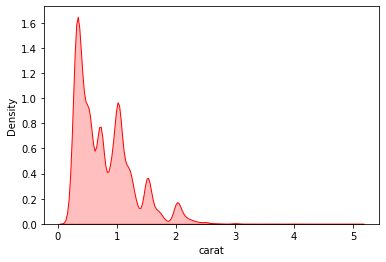

In [4]:
sns.kdeplot(data['carat'], shade=True , color='r')

/home/pablofdez/miniconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


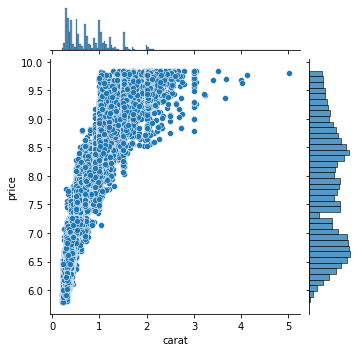

In [5]:
sns.jointplot(x='carat' , y='price' , data=data , size=5)

/home/pablofdez/miniconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


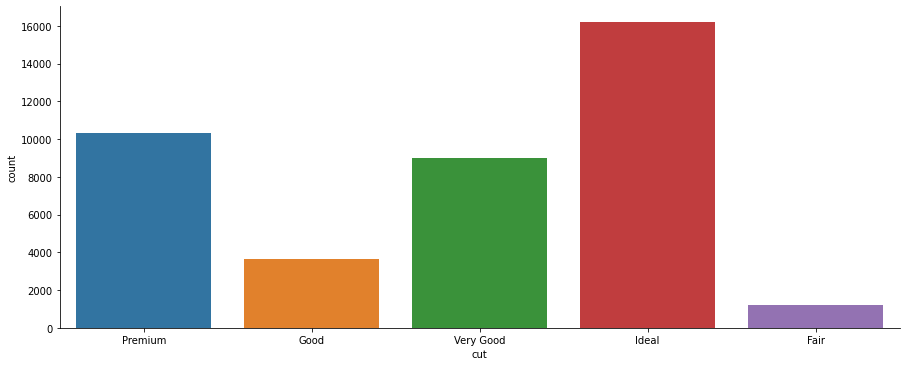

In [6]:
sns.factorplot(x='cut', data=data , kind='count',aspect=2.5 )

/home/pablofdez/miniconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


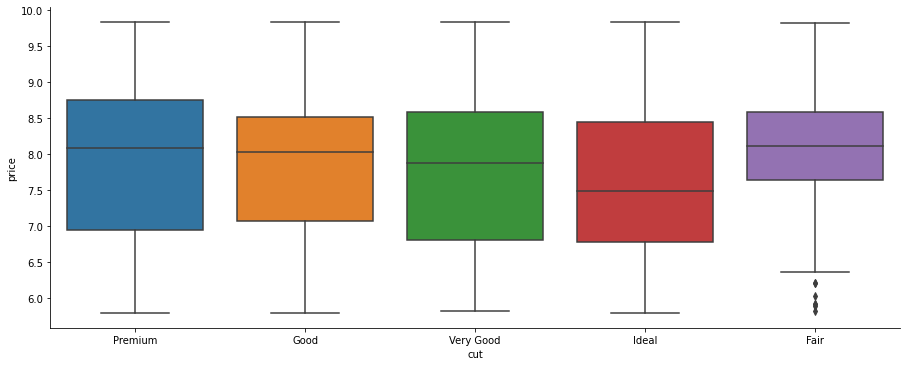

In [7]:
sns.factorplot(x='cut', y='price', data=data, kind='box' ,aspect=2.5 )

/home/pablofdez/miniconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


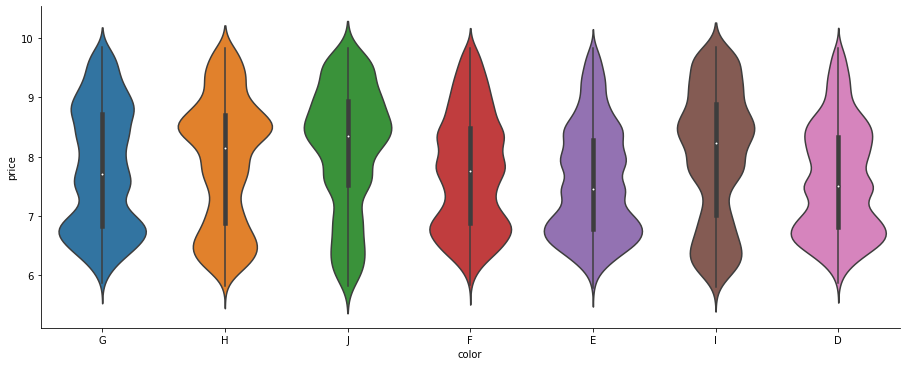

In [8]:
sns.factorplot(x='color', y='price' , data=data , kind='violin', aspect=2.5)

<AxesSubplot:xlabel='clarity', ylabel='price'>

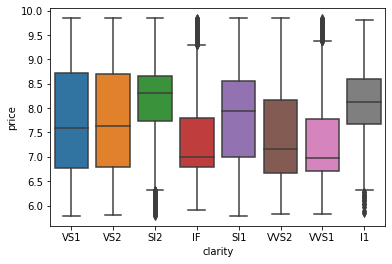

In [9]:
sns.boxplot(x='clarity', y='price', data=data)

In [10]:
data["volume"] = data["x"]*data["y"]*data["z"]

In [11]:
data.drop(columns = ["x", "y", "z"], inplace = True)

In [12]:
data.head()

,id,carat,cut,color,clarity,depth,table,price,volume
0,0,1.01,Premium,G,VS1,62.7,58.0,8.754,159.322452
1,1,0.60,Good,G,VS2,64.3,57.0,7.492,97.987554
2,2,1.60,Premium,H,SI2,59.4,59.0,9.010,258.210000
3,3,0.30,Very Good,J,VS1,63.5,58.0,6.227,48.882960
4,4,1.00,Very Good,F,SI2,62.8,57.0,8.314,164.911656


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
# Creamos una columna nueva que es "embarked_n" con la transformación a numérica de las categorías 
data["color_n"] = le.fit_transform(data["color"])
data["cut_n"] = le.fit_transform(data["cut"])
data["clarity_n"] = le.fit_transform(data["clarity"])


In [15]:
data.drop(columns = ["color", "cut", "clarity"], inplace = True)

In [16]:
data.head()

,id,carat,depth,table,price,volume,color_n,cut_n,clarity_n
0,0,1.01,62.7,58.0,8.754,159.322452,3,3,4
1,1,0.60,64.3,57.0,7.492,97.987554,3,1,5
2,2,1.60,59.4,59.0,9.010,258.210000,4,3,3
3,3,0.30,63.5,58.0,6.227,48.882960,6,4,4
4,4,1.00,62.8,57.0,8.314,164.911656,2,4,3


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
X = data.drop(columns = ["id", "price"])
y = data.price

In [19]:
lr.fit(X, y)

LinearRegression()

In [20]:
y_pred = lr.predict(X)

In [21]:
from sklearn import metrics
import statsmodels.formula.api as smf

In [22]:
print("MAE: " , metrics.mean_absolute_error(data.price, y_pred))
print("MSE: " , metrics.mean_squared_error(data.price, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(data.price, y_pred)))


MAE:  0.28819501741553294
MSE:  0.1362744299808118
RMSE:  0.3691536671642472


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
data_test = pd.read_csv("./test.csv")

In [26]:
data_test["volume"] = data_test["x"]*data_test["y"]*data_test["z"]

In [27]:
data_test.drop(columns = ["x", "y", "z"], inplace = True)

In [28]:
# Creamos una columna nueva que es "embarked_n" con la transformación a numérica de las categorías 
data_test["color_n"] = le.fit_transform(data_test["color"])
data_test["cut_n"] = le.fit_transform(data_test["cut"])
data_test["clarity_n"] = le.fit_transform(data_test["clarity"])


In [29]:
data_test.drop(columns = ["color", "cut", "clarity"], inplace = True)

In [30]:
X1 = data_test.drop(columns = ["id"])

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [32]:
parameters = {'bootstrap': [True],
 'max_depth': [20, 50, 70, 100, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 800, 1400, 2000]}

In [33]:
randomforest = RandomForestRegressor(max_depth=5, 
                                     random_state=12, 
                                     n_estimators = 1000)

In [34]:
grid = GridSearchCV(randomforest, parameters, verbose=10)

In [ ]:
grid.fit(X,y)


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV 1/5; 1/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  14.2s
[CV 2/5; 1/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  14.0s
[CV 3/5; 1/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  14.0s
[CV 4/5; 1/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split

[CV 5/5; 6/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  17.5s
[CV 1/5; 7/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400
[CV 1/5; 7/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  34.4s
[CV 2/5; 7/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400
[CV 2/5; 7/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  34.5s
[CV 3/5; 7/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400
[CV 3/5; 7/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  35.4s
[CV 4/5; 7/225] START boo

[CV 5/5; 12/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  27.5s
[CV 1/5; 13/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800
[CV 1/5; 13/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  57.2s
[CV 2/5; 13/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800
[CV 2/5; 13/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  55.4s
[CV 3/5; 13/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800
[CV 3/5; 13/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  55.0s
[CV 4/5; 13

[CV 5/5; 18/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  59.9s
[CV 1/5; 19/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400
[CV 1/5; 19/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time= 1.8min
[CV 2/5; 19/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400
[CV 2/5; 19/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time= 2.0min
[CV 3/5; 19/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400
[CV 3/5; 19/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time= 1.9min
[CV 4/5; 19/

[CV 5/5; 24/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time= 1.9min
[CV 1/5; 25/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 1/5; 25/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 2.6min
[CV 2/5; 25/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 2/5; 25/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 2.6min
[CV 3/5; 25/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 3/5; 25/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 2.8min
[CV 4/5; 25

[CV 5/5; 30/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 2.5min
[CV 1/5; 31/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/5; 31/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  14.5s
[CV 2/5; 31/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 31/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  14.7s
[CV 3/5; 31/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 3/5; 31/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  14.9s
[CV 4/5; 31/225]

[CV 5/5; 36/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  25.7s
[CV 1/5; 37/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 1/5; 37/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=  39.9s
[CV 2/5; 37/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 2/5; 37/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=  37.3s
[CV 3/5; 37/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 3/5; 37/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=  29.5s
[CV 4/5; 37/225] S

[CV 5/5; 42/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  28.4s
[CV 1/5; 43/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800
[CV 1/5; 43/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  53.9s
[CV 2/5; 43/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800
[CV 2/5; 43/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  52.1s
[CV 3/5; 43/225] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800
[CV 3/5; 43/225] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  53.9s
[CV 4/5; 43

[CV 5/5; 48/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min
[CV 1/5; 49/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 1/5; 49/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.9min
[CV 2/5; 49/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 2/5; 49/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.9min
[CV 3/5; 49/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 3/5; 49/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.9min
[CV 4/5; 49/

[CV 5/5; 54/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 1.8min
[CV 1/5; 55/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 1/5; 55/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 2.6min
[CV 2/5; 55/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 2/5; 55/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 2.6min
[CV 3/5; 55/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 3/5; 55/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 2.6min
[CV 4/5; 55

[CV 5/5; 60/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 2.4min
[CV 1/5; 61/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 61/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  15.6s
[CV 2/5; 61/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/5; 61/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  15.4s
[CV 3/5; 61/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 61/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  15.3s
[CV 4/5; 61/225]

[CV 5/5; 66/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  15.3s
[CV 1/5; 67/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 1/5; 67/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  28.8s
[CV 2/5; 67/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 2/5; 67/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  28.7s
[CV 3/5; 67/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 3/5; 67/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  29.2s
[CV 4/5; 67/225] S

[CV 5/5; 72/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  29.1s
[CV 1/5; 73/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800
[CV 1/5; 73/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  57.5s
[CV 2/5; 73/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800
[CV 2/5; 73/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  57.5s
[CV 3/5; 73/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800
[CV 3/5; 73/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  57.2s
[CV 4/5; 73

[CV 5/5; 78/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  51.4s
[CV 1/5; 79/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400
[CV 1/5; 79/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time= 1.6min
[CV 2/5; 79/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400
[CV 2/5; 79/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time= 1.6min
[CV 3/5; 79/225] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400
[CV 3/5; 79/225] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time= 1.5min
[CV 4/5; 79/

In [ ]:
print(grid.best_params_)

In [ ]:
rf_fit = randomforest.fit(X, y)
y1 = rf_fit.predict(X1)

In [ ]:
rf_fit = randomforest.fit(X, y)
accuracies = cross_val_score(estimator = rf_fit, X = X, y = y, cv = 5,verbose = 1)
y_pred = rf_fit.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred)**0.5
r2 = r2_score(y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

In [ ]:
mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y, y1))
mean_squared = "Mean Square Error: {}".format(mean_squared_error(y, y1))
r2 = "r2 score: {}".format(r2_score(y, y1))

In [ ]:
data_test["price"] = y1

In [ ]:
data_test.drop(columns = ["carat", "depth", "table", "volume", "color_n", "cut_n", "clarity_n"], inplace = True)

In [ ]:
data_test.to_csv("./model_2.csv")